In [1]:

#-LIBRARY CALL
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import datetime

import warnings
warnings.filterwarnings('ignore')

#Preprossesing 
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import RFE

#cross validation 
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve 

#scorring 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import make_scorer, mean_squared_error

#Common Model Algorithms
from sklearn.linear_model import SGDRegressor, SGDClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor, VotingRegressor,ExtraTreesRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_validate
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import SelectKBest,chi2

In [32]:
#Fuctions
def mean_squared_error_(ground_truth, predictions):
    return mean_squared_error(ground_truth, predictions) ** 0.5
RMSE = make_scorer(mean_squared_error_, greater_is_better=False)  

### Exploratory Data Analysis

In [3]:
df=pd.read_csv('CarPrice_Assignment.csv')
pd.set_option('display.max_columns',500)
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [5]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [6]:
#Categorical features
for col in df.select_dtypes('object').columns:
    print(f'Categories of the feature {col :.<20}: {df[col].unique()}\n')

Categories of the feature CarName.............: ['alfa-romero giulia' 'alfa-romero stelvio' 'alfa-romero Quadrifoglio'
 'audi 100 ls' 'audi 100ls' 'audi fox' 'audi 5000' 'audi 4000'
 'audi 5000s (diesel)' 'bmw 320i' 'bmw x1' 'bmw x3' 'bmw z4' 'bmw x4'
 'bmw x5' 'chevrolet impala' 'chevrolet monte carlo' 'chevrolet vega 2300'
 'dodge rampage' 'dodge challenger se' 'dodge d200' 'dodge monaco (sw)'
 'dodge colt hardtop' 'dodge colt (sw)' 'dodge coronet custom'
 'dodge dart custom' 'dodge coronet custom (sw)' 'honda civic'
 'honda civic cvcc' 'honda accord cvcc' 'honda accord lx'
 'honda civic 1500 gl' 'honda accord' 'honda civic 1300' 'honda prelude'
 'honda civic (auto)' 'isuzu MU-X' 'isuzu D-Max ' 'isuzu D-Max V-Cross'
 'jaguar xj' 'jaguar xf' 'jaguar xk' 'maxda rx3' 'maxda glc deluxe'
 'mazda rx2 coupe' 'mazda rx-4' 'mazda glc deluxe' 'mazda 626' 'mazda glc'
 'mazda rx-7 gs' 'mazda glc 4' 'mazda glc custom l' 'mazda glc custom'
 'buick electra 225 custom' 'buick century luxus (sw)' 'bu

In [7]:
#Car_Name => Company
df=pd.read_csv('CarPrice_Assignment.csv')
df['Company']=df['CarName'].apply(lambda x:x.split(' ')[0])
df['Company']=df['Company'].str.lower()
df=df.drop('CarName',axis=1)
dic={'maxda':'mazda',
    'toyouta':'toyota',
    'vokswagen':'volkswagen',
    'vw':'volkswagen',
    'porcshce':'porsche'}

df['Company']=df['Company'].replace(dic)
df['Company'].value_counts()



toyota         32
nissan         18
mazda          17
honda          13
mitsubishi     13
volkswagen     12
subaru         12
volvo          11
peugeot        11
dodge           9
buick           8
bmw             8
plymouth        7
audi            7
saab            6
porsche         5
isuzu           4
chevrolet       3
alfa-romero     3
jaguar          3
renault         2
mercury         1
Name: Company, dtype: int64

In [8]:
#check for duplicates rows
df.duplicated().value_counts()


False    205
dtype: int64

## Missing data

In [9]:
df.isna().sum()
# no missing data 

car_ID              0
symboling           0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
Company             0
dtype: int64

### Target

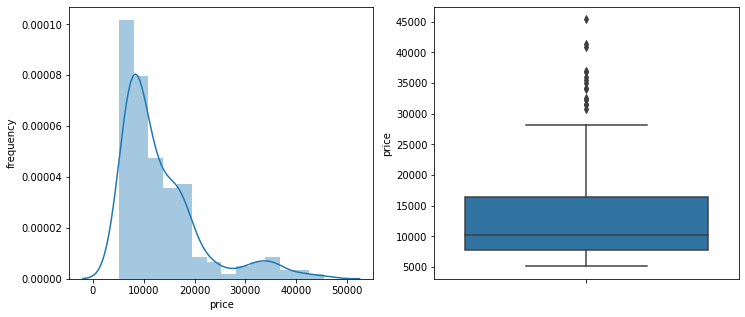

In [10]:
plt.subplots(figsize=(12,5))
plt.subplot(121)
sns.distplot(df['price'])
plt.ylabel('frequency')
plt.subplot(122)
sns.boxplot(y=df['price'])

In [11]:
df['price'].describe(percentiles=[0.25,0.5,0.75,0.85,0.9,1])

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
85%      18500.000000
90%      22563.000000
100%     45400.000000
max      45400.000000
Name: price, dtype: float64

Price variable is positive skweed (right skewed) there is a significant difference btw the mean and median (mean higher than median) => this skewness (asymmetry) affect the regression intercept(coef associated with the model) ==> as all values are positive with no zeros we can to fix it by performing log transformation
if we perform this log trannsformation we need also to log transform features that are skewed.

In [12]:
df['price'].skew()

1.7776781560914454

Text(0.5, 1.0, 'Reciprocal price skewness : 0.21')

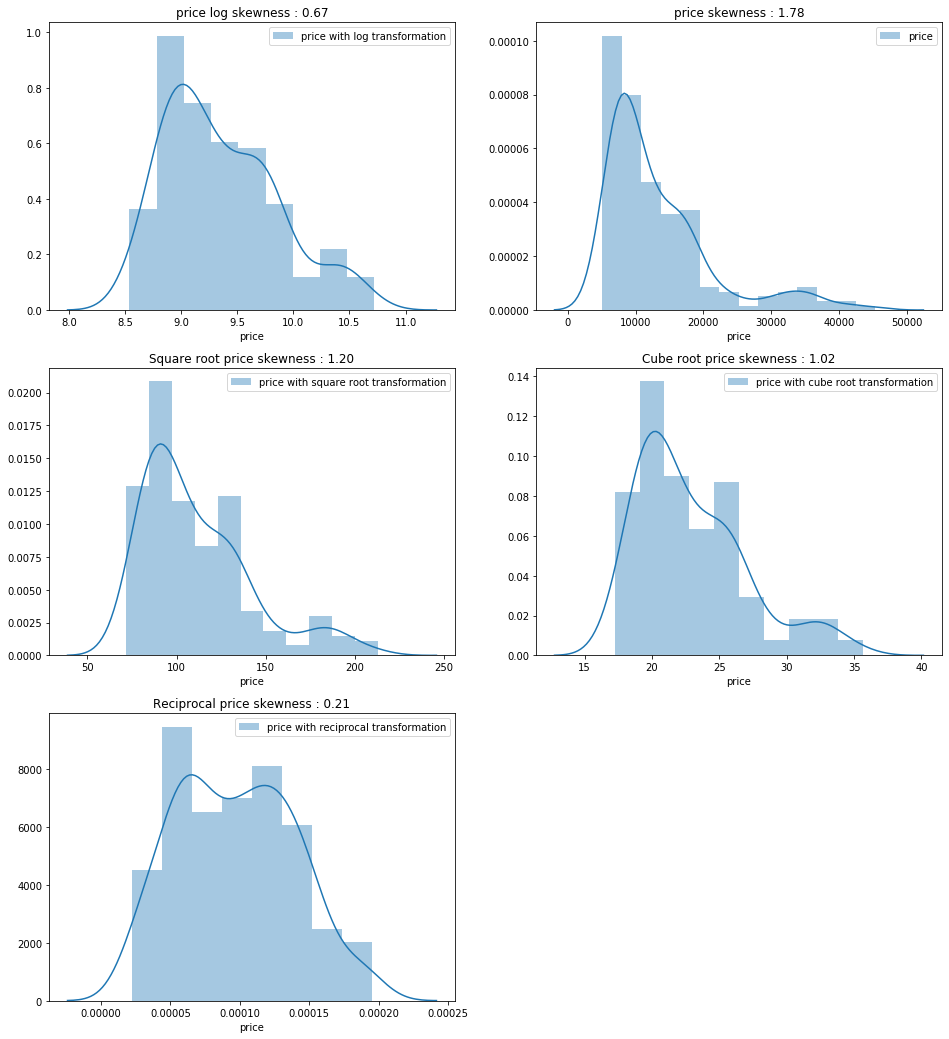

In [13]:
plt.figure(figsize=(16,18))
plt.subplot(322)
sns.distplot(df['price'],label='price')
plt.legend()
plt.title('price skewness : {:.2f}'.format(df['price'].skew()))
plt.subplot(321)
sns.distplot(np.log(df['price']),label='price with log transformation')
plt.title('price log skewness : {:.2f}'.format(np.log(df['price']).skew()))
plt.legend()
plt.subplot(323)
sns.distplot((df['price'].apply(lambda x:x**(0.5))),label='price with square root transformation')
plt.legend()
plt.title('Square root price skewness : {:.2f}'.format((df['price'].apply(lambda x:x**(0.5))).skew()))
plt.subplot(324)
sns.distplot((df['price'].apply(lambda x:x**(1/3))),label='price with cube root transformation')
plt.legend()
plt.title('Cube root price skewness : {:.2f}'.format((df['price'].apply(lambda x:x**(1/3))).skew()))
plt.subplot(325)
sns.distplot((df['price'].apply(lambda x:1/x)),label='price with reciprocal transformation')
plt.legend()
plt.title('Reciprocal price skewness : {:.2f}'.format((df['price'].apply(lambda x:1/x)).skew()))


Reciprocal transformation seem to have the highest impact to get normal distribution 

### Numerical features

In [14]:
df_num=df.select_dtypes(('int64','float'))
for col in df_num.columns:
    print('skweness of {} is : {:.2f} '.format(col,df[col].skew()))

skweness of car_ID is : 0.00 
skweness of symboling is : 0.21 
skweness of wheelbase is : 1.05 
skweness of carlength is : 0.16 
skweness of carwidth is : 0.90 
skweness of carheight is : 0.06 
skweness of curbweight is : 0.68 
skweness of enginesize is : 1.95 
skweness of boreratio is : 0.02 
skweness of stroke is : -0.69 
skweness of compressionratio is : 2.61 
skweness of horsepower is : 1.41 
skweness of peakrpm is : 0.08 
skweness of citympg is : 0.66 
skweness of highwaympg is : 0.54 
skweness of price is : 1.78 


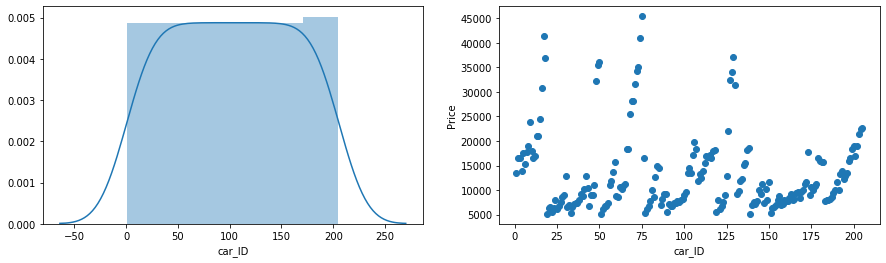

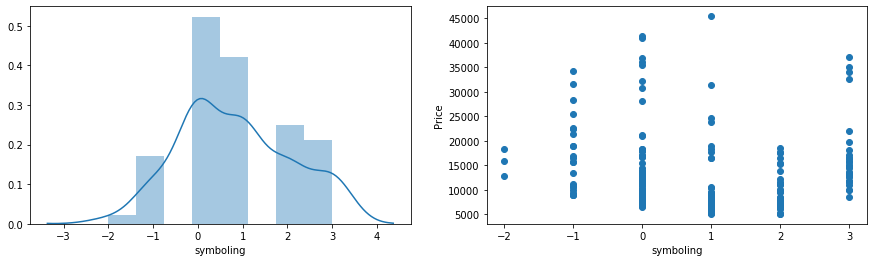

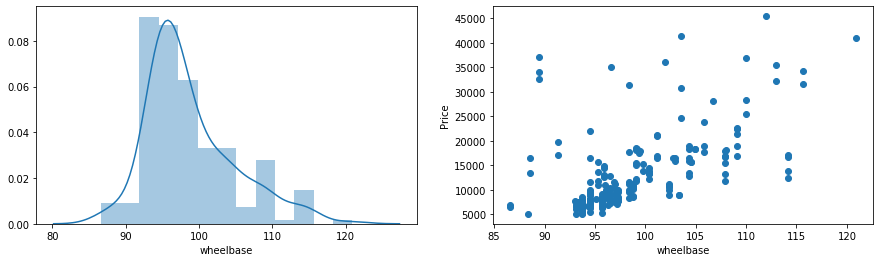

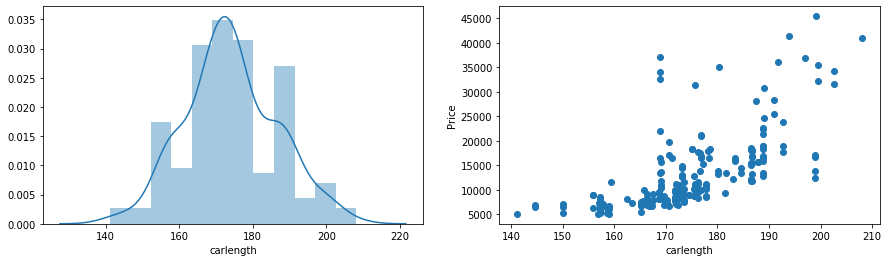

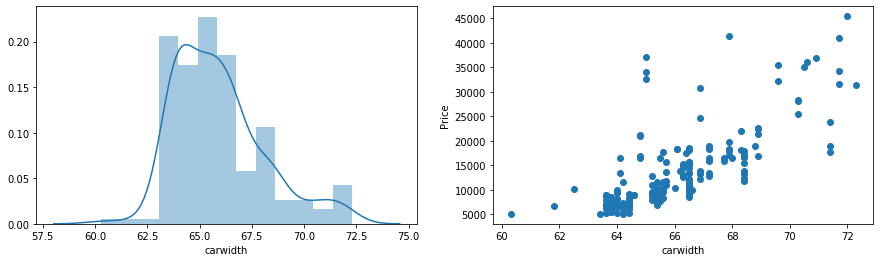

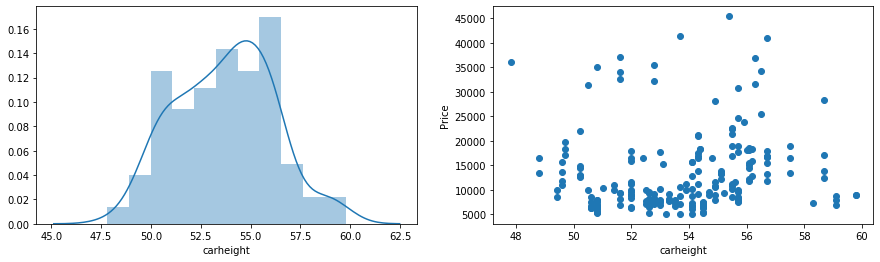

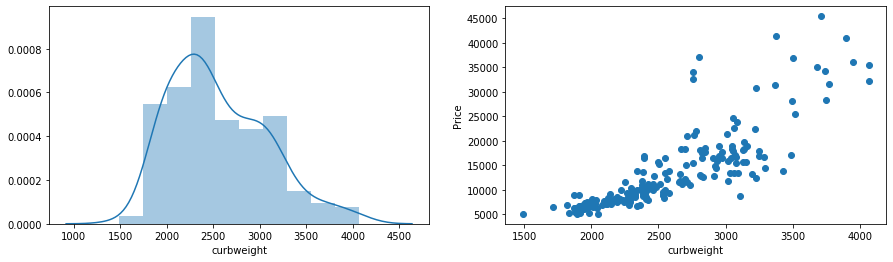

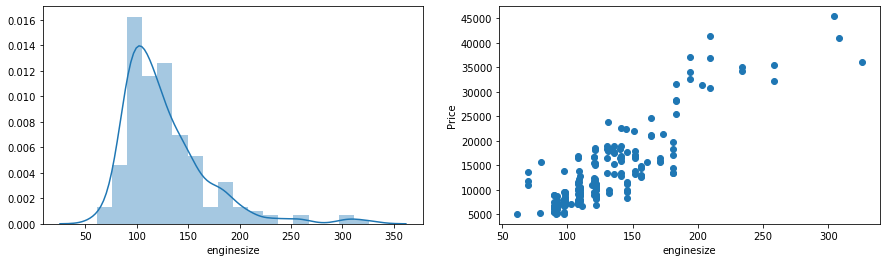

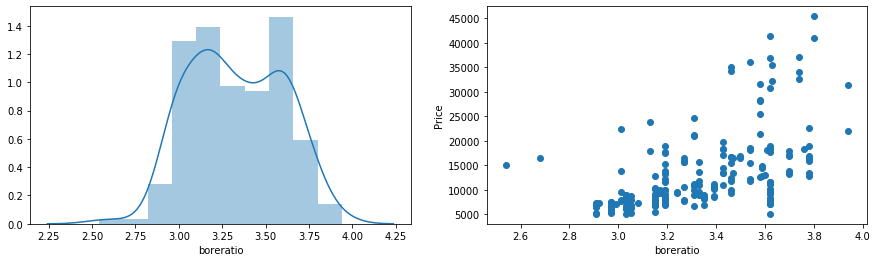

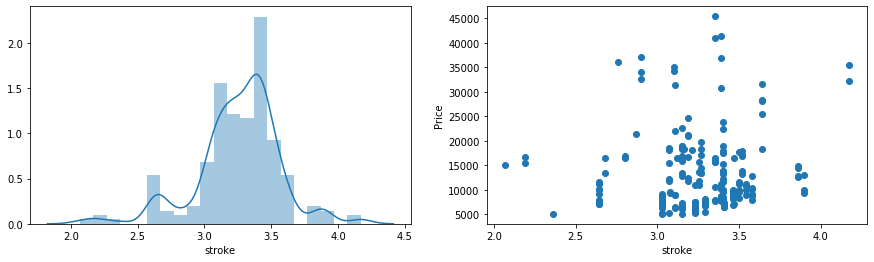

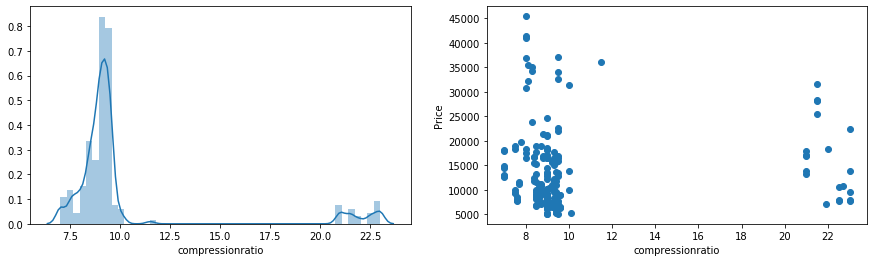

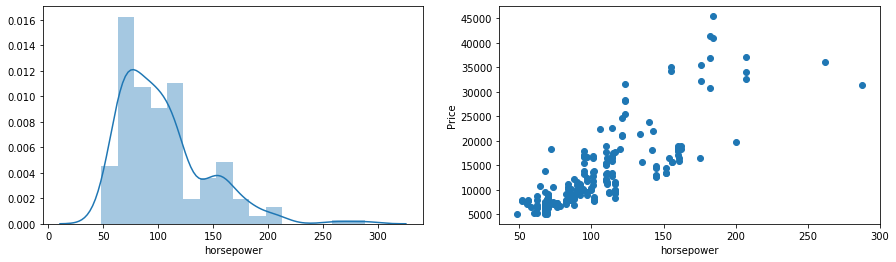

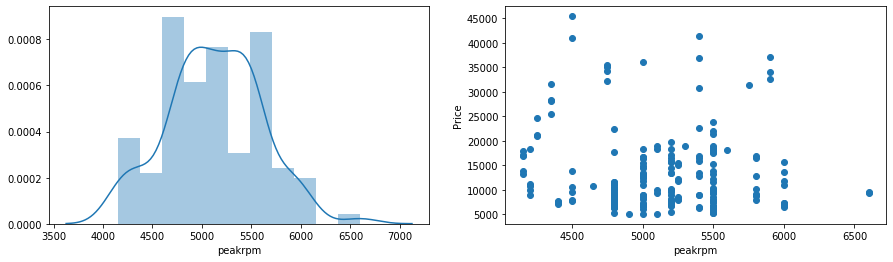

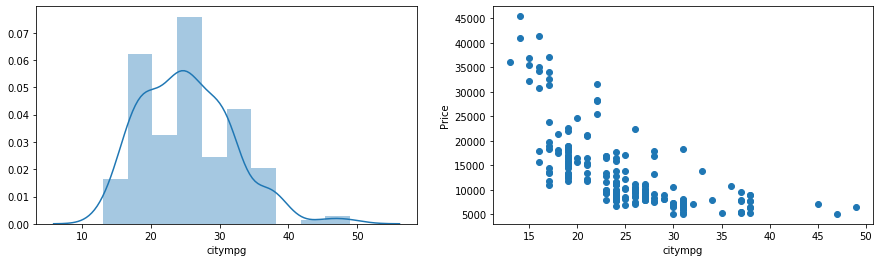

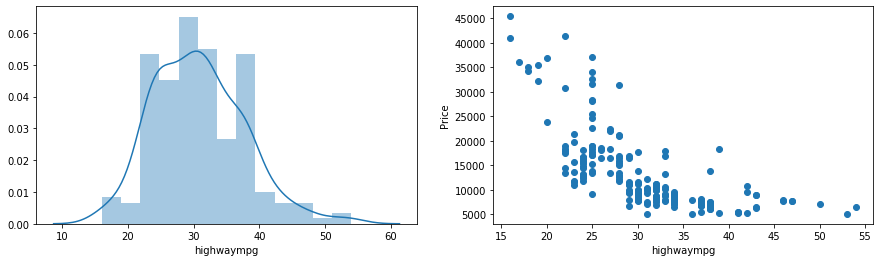

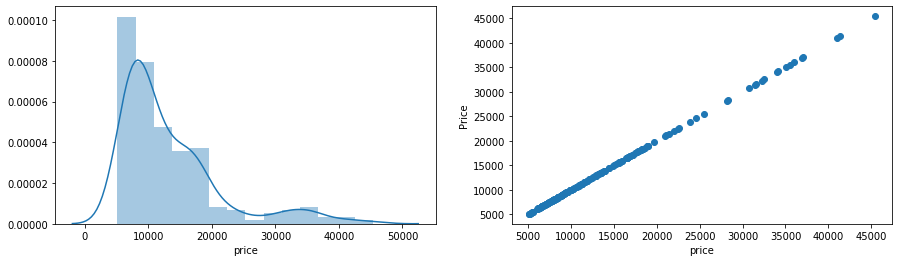

In [15]:
for col in df.select_dtypes(('int64','float')).columns:
    plt.figure(figsize=(15,4))
    plt.subplot(121)
    sns.distplot(df[col])
    plt.subplot(122)
    plt.scatter(x=df[col],y=df['price'])
    plt.xlabel(col)
    plt.ylabel('Price')

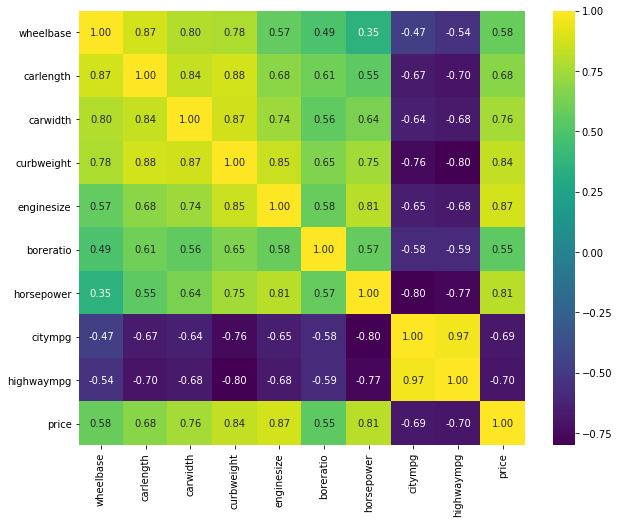

In [16]:
#Features with higher correlation with price (more than )
df_num=df.select_dtypes(('int64','float'))
features=(abs(df_num.corr()['price'])>0.5)
plt.figure(figsize=(10,8))
sns.heatmap(df_num[df_num.columns[features]].corr(),annot=True,fmt='.2f',cmap='viridis')

    Carwidth, carlength, curbweight enginesize, boreratio, horsepower and wheelbase have a significant positive correlation with price.
    Citympg and highwaympg  have a significant negative correlation with price.


## Categorical features

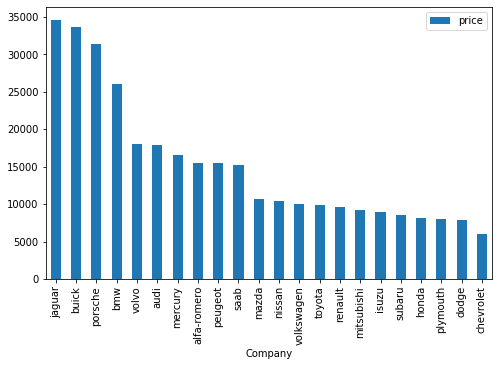

In [17]:
#price by companies
df1=pd.DataFrame(df.groupby('Company')['price'].mean().sort_values(ascending=False))
#plt.figure(figsize=(25,9))
df1.plot.bar(figsize=(8,5))

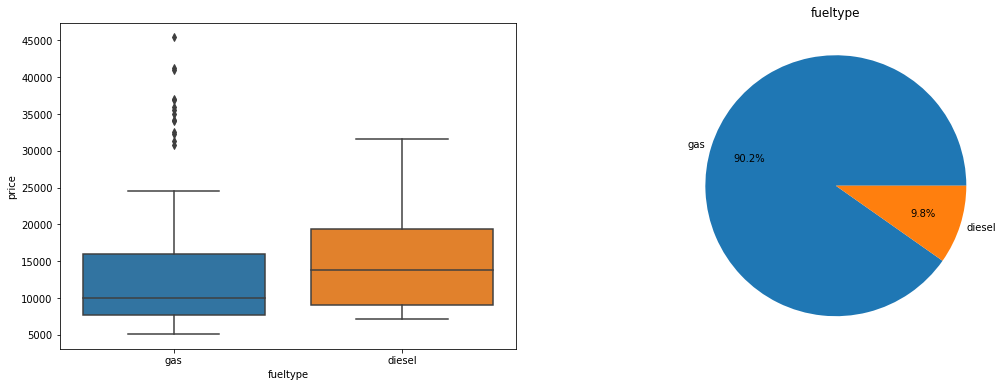

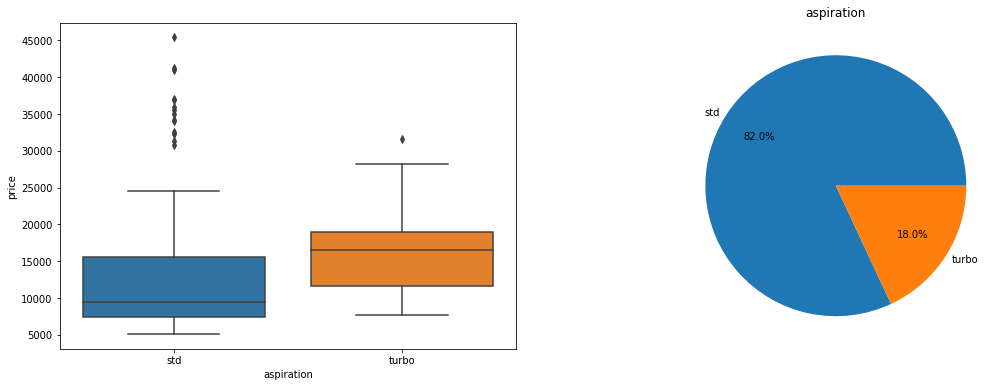

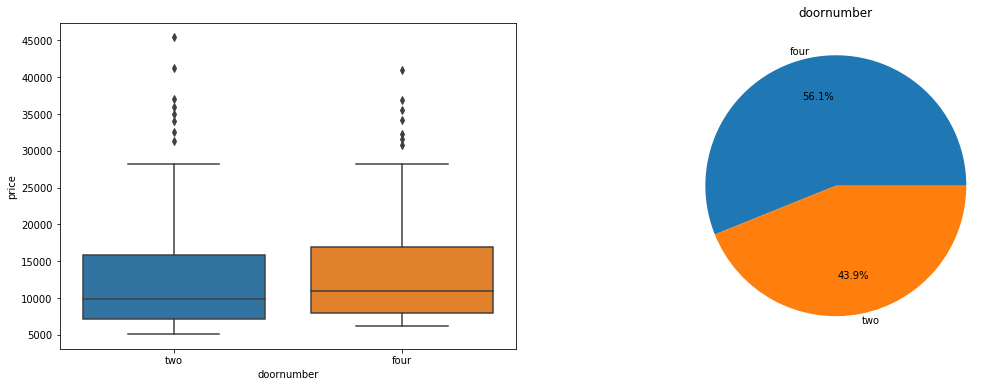

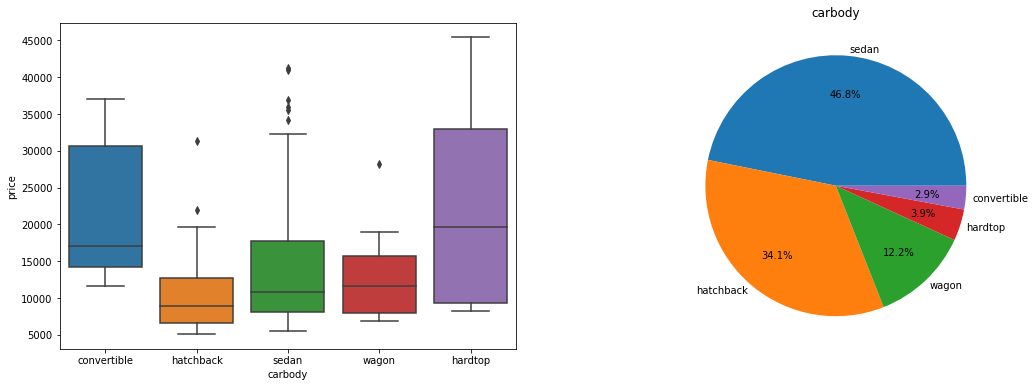

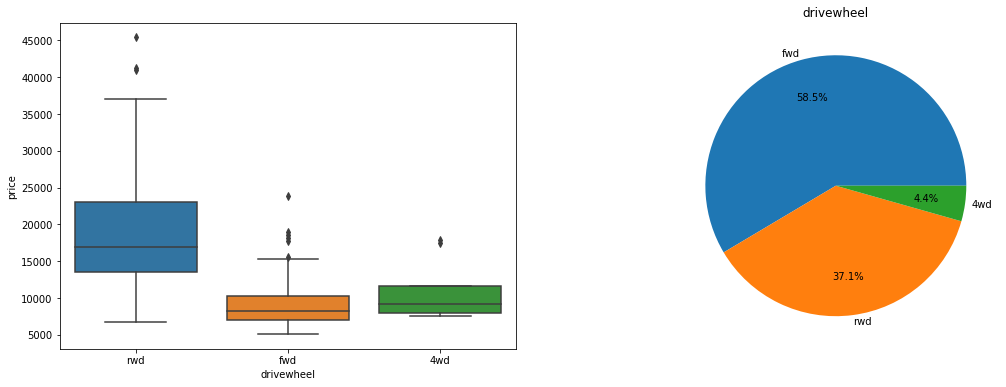

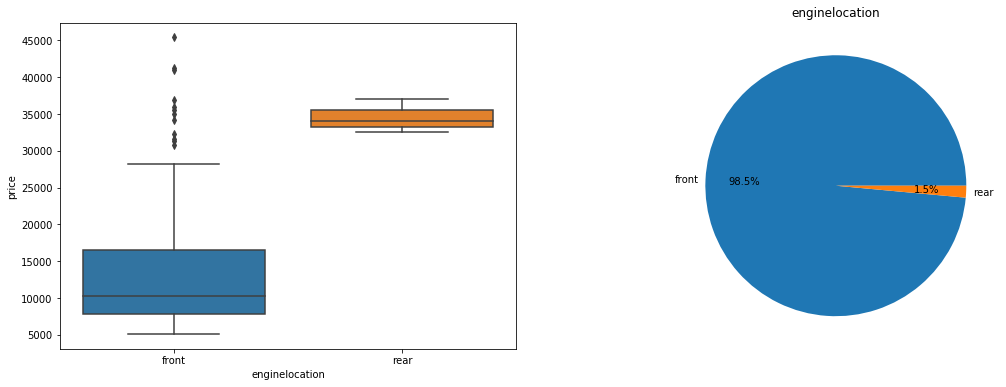

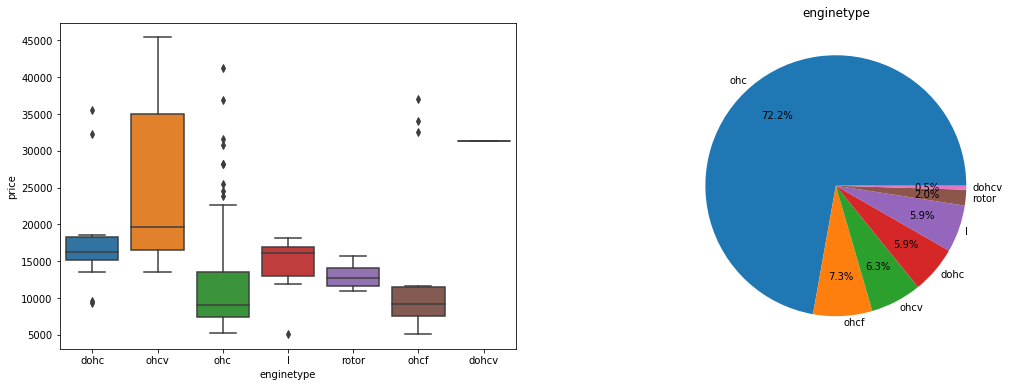

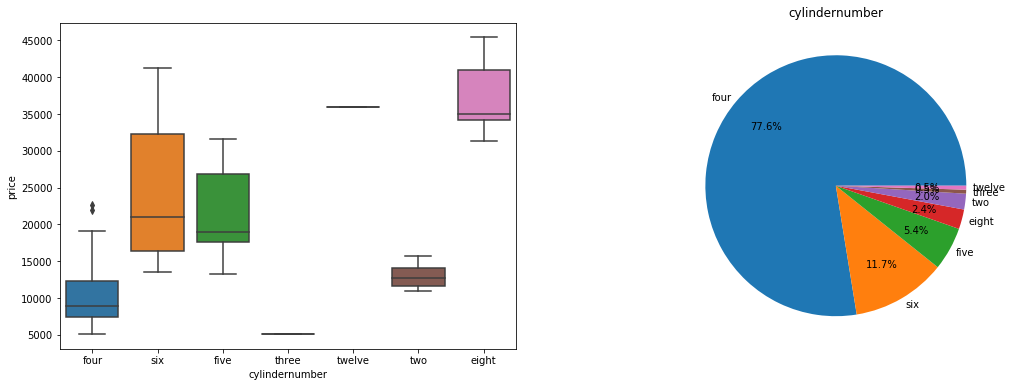

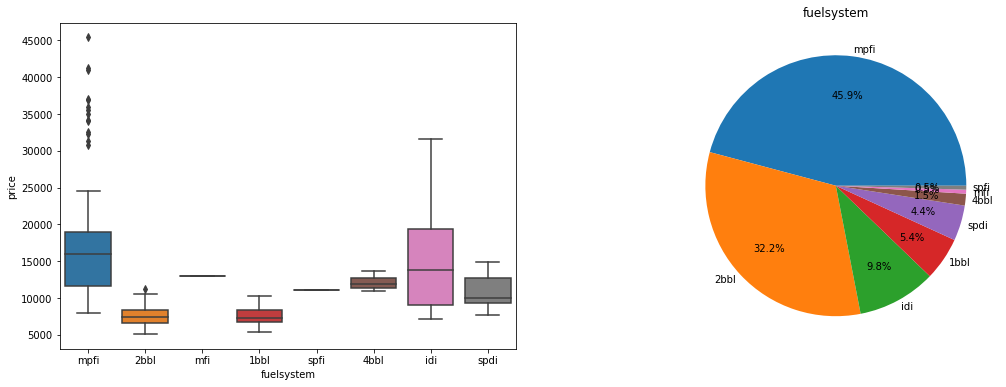

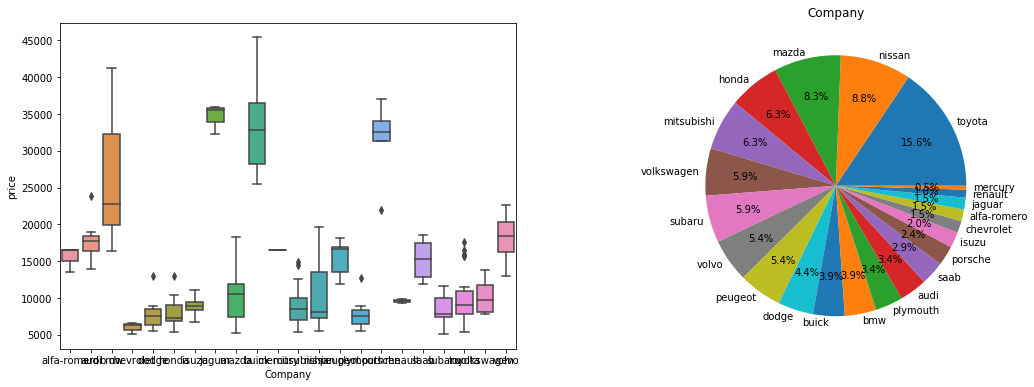

In [18]:


for col in df.select_dtypes('object').columns:
    plt.figure(figsize=(18,6))
    plt.subplot(121)
    sns.boxplot(x=df[col],y=df['price'])
    
    plt.subplot(122)
    plt.pie( df[col].value_counts(),labels= df[col].value_counts().index,autopct='%.1f%%',labeldistance = 1.05,pctdistance = 0.7,textprops={'fontsize': 10})
    plt.title(col)

    Jaguar car has the highest average price.
    Toyota seemed to be the favored car
    Gasoline cars are more than diesel cars, diesel cars have higher average price
    Cars with aspiration by turbo have higher price range
    Almost same average price for cars with 2 or 4 doors
    Sedan cars seemed to be the prefered car in this market, Hardtop and convertible had the highest average price
    OHC Engine types seems to be favored type, ohvc has the highest price range
    The most commun number of cylinders are four cylinders engines

## Preprocessing_Modelling

In [19]:
from sklearn.preprocessing import MinMaxScaler

df=pd.read_csv('CarPrice_Assignment.csv')
for col in df_num.columns:
    if df[col].skew()>1:
        print('skweness of {} is : {:.2f} '.format(col,df[col].skew()))
        df[col]=df[col].apply(lambda x : 1/(x))
        print('skweness of {} after transformation is : {:.2f} '.format(col,df[col].skew()))
df['price']=df['price'].apply(lambda x : np.log(x))

df=df.drop(['car_ID','CarName'],axis=1)

#Convert categorical variable into dummy/indicator variables.
df=pd.get_dummies(df) #Dummies => should be created before spliting dataset into train and test

#spliting train and test data
X = df.drop(['price'],axis=1)
y = df['price']
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)

#transformation MinMaxScaler() => only on train data to avoid data leakage 
MMScaler =MinMaxScaler()
X_train_transformed=MMScaler.fit_transform(X_train)
X_test_transformed= MMScaler.transform(X_test)
X_train_transformed=pd.DataFrame(X_train_transformed,columns=X_train.columns)
X_test_transformed=pd.DataFrame(X_test_transformed,columns=X_test.columns)

# Y MaxMinScaler
MMScalery=MinMaxScaler().fit(y_train[:,np.newaxis])
y_train_transformed=MMScalery.transform(y_train[:,np.newaxis]).reshape(-1)
y_test_transformed=MMScalery.transform(y_test[:,np.newaxis]).reshape(-1)

#Feature selection using the selector recursive feature elimination.  
lm=LinearRegression()
selector_rfe=RFE(lm,n_features_to_select=20)
selector_rfe=selector_rfe.fit(X_train_transformed,y_train_transformed)

X_train_transformed = X_train_transformed[X_train_transformed.columns[selector_rfe.support_]]
X_test_transformed=X_test_transformed[X_train_transformed.columns]
#list(zip(X_train.columns,selector_rfe.support_,selector_rfe.ranking_))


skweness of wheelbase is : 1.05 
skweness of wheelbase after transformation is : -0.72 
skweness of enginesize is : 1.95 
skweness of enginesize after transformation is : 0.04 
skweness of compressionratio is : 2.61 
skweness of compressionratio after transformation is : -1.83 
skweness of horsepower is : 1.41 
skweness of horsepower after transformation is : 0.21 
skweness of price is : 1.78 
skweness of price after transformation is : 0.21 


In [35]:
random_state=0
RFR=RandomForestRegressor(
    n_jobs=1, random_state=0,
    n_estimators=300, max_features=20, max_depth=7)

ETR=ExtraTreesRegressor(
    n_jobs=1, random_state=0, 
    n_estimators=500, max_features=20)

GBR=GradientBoostingRegressor(
    random_state=0, 
    n_estimators=300, max_features=10, max_depth=10,
    learning_rate=0.05, subsample=0.5)

XGBR=XGBRegressor(objective='reg:squarederror',random_state=random_state,
    seed=0,
    n_estimators=500, max_depth=7,
    learning_rate=0.01, subsample=0.5 ,colsample_bytree= 0.8)

from sklearn.ensemble import StackingRegressor
regB=StackingRegressor([('RFR',RFR),
                       ('ETR',ETR),
                       ('GBR',GBR),
                       ('XGBR',XGBR)])

classifiers = [
              LinearRegression(),
              SVR(),
              KNeighborsRegressor(),
              DecisionTreeRegressor(random_state=random_state),
              RandomForestRegressor(random_state=random_state),
              AdaBoostRegressor(random_state=random_state,learning_rate=0.1),
              GradientBoostingRegressor(random_state=random_state),
              MLPRegressor(random_state=random_state),
              SGDRegressor(random_state = random_state),
              ExtraTreesRegressor(random_state=random_state),
              XGBRegressor(objective='reg:squarederror',random_state=random_state),
              regB
              ]
res_columns=['Clf name','RMSE_val','RMSE_test','r2_score_val','r2score_test']
df_result = pd.DataFrame(columns = res_columns)
cv=KFold(5)
idx_raws=0
for cl in classifiers: 
    cl.fit(X_train_transformed,y_train_transformed)
    df_result.loc[idx_raws, 'Clf name']= cl.__class__.__name__
    df_result.loc[idx_raws,'RMSE_val' ]=cross_validate(cl,X_train_transformed, y_train_transformed,cv=cv, scoring=RMSE)['test_score'].mean()*(-1)
    df_result.loc[idx_raws,'RMSE_test' ]=mean_squared_error(y_test_transformed,cl.predict(X_test_transformed))**(0.5)
    df_result.loc[idx_raws,'r2_score_val']=cross_validate(cl,X_train_transformed, y_train_transformed, cv=cv, scoring='r2')['test_score'].mean()
    df_result.loc[idx_raws,'r2score_test']=r2_score(y_test_transformed,cl.predict(X_test_transformed))
    idx_raws=idx_raws+1
    df_result.sort_values(by='r2score_test',ascending=False,inplace=True)
df_result

,Clf name,RMSE_val,RMSE_test,r2_score_val,r2score_test
11,StackingRegressor,0.0701439,0.0766463,0.902349,0.909728
10,XGBRegressor,0.0699271,0.0796399,0.905902,0.902538
6,GradientBoostingRegressor,0.0720091,0.0803118,0.897887,0.900887
9,ExtraTreesRegressor,0.0721968,0.0806107,0.89661,0.900148
4,RandomForestRegressor,0.0741884,0.0807513,0.89256,0.899799
5,AdaBoostRegressor,0.0787259,0.0920189,0.881663,0.869885
0,LinearRegression,0.0736355,0.0949594,0.896076,0.861436
1,SVR,0.0833678,0.100624,0.870909,0.844411
3,DecisionTreeRegressor,0.0967426,0.108303,0.82239,0.819758
2,KNeighborsRegressor,0.102568,0.112188,0.809268,0.806597


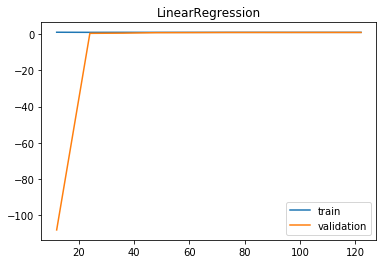

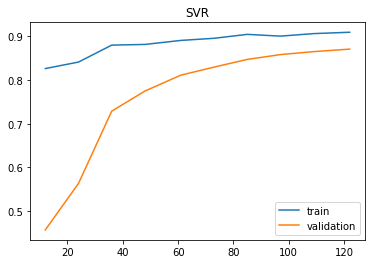

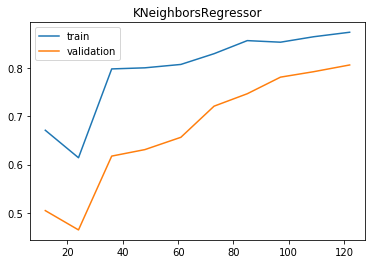

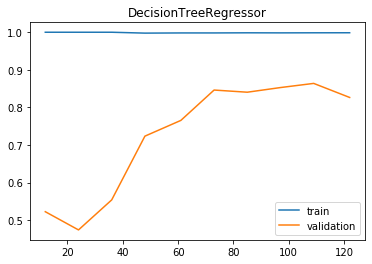

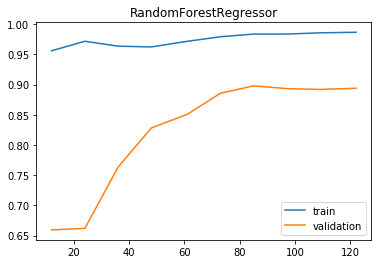

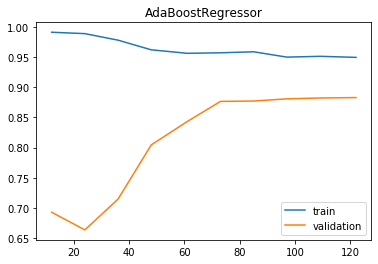

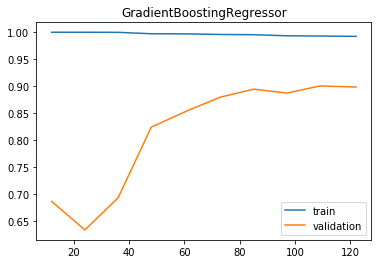

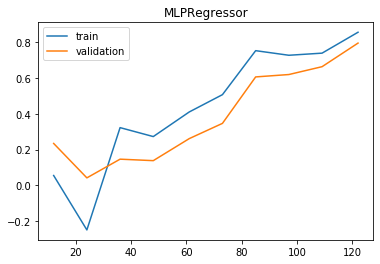

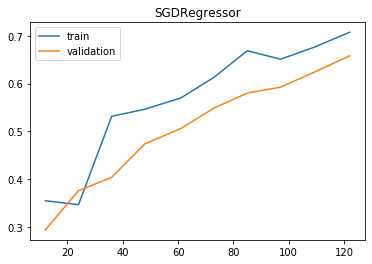

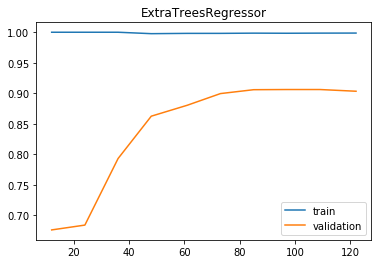

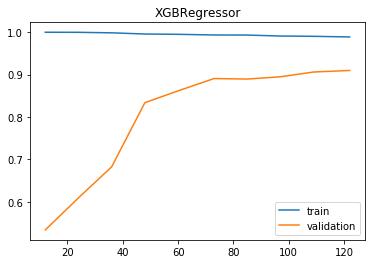

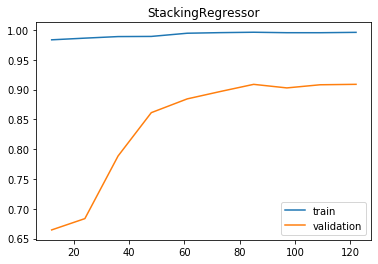

In [21]:
#Learning curve 
from sklearn.model_selection import learning_curve 
for cl in classifiers:
    N,train_score, val_score=learning_curve(cl, X_train_transformed,y_train_transformed,train_sizes=np.linspace(0.1,1,10),scoring='r2',cv=cv)
    plt.figure()
    plt.plot(N,train_score.mean(axis=1),label='train')
    plt.plot(N,val_score.mean(axis=1),label='validation')
    plt.legend()
    plt.title(cl.__class__.__name__)

In [22]:
gbr = GradientBoostingRegressor(random_state=0)
param_grid = {
      'n_estimators': [100,300,500],
      'max_features': [10,15,20],
      'max_depth': [6,8,10],
      'learning_rate': [0.05,0.1,0.15],
      'subsample': [0.5,0.9]
 }
model = GridSearchCV(estimator=gbr, param_grid=param_grid, n_jobs=1, cv=10, scoring=RMSE)
model.fit(X_train_transformed, y_train_transformed)
print('Gradient boosted tree regression...')
print('Best Params:')
print(model.best_params_)
print('Best CV Score:')
print(-model.best_score_)

Gradient boosted tree regression...
Best Params:
{'learning_rate': 0.05, 'max_depth': 6, 'max_features': 15, 'n_estimators': 100, 'subsample': 0.5}
Best CV Score:
0.06755260631529465


In [23]:
etr = ExtraTreesRegressor(n_jobs=1, random_state=0)
param_grid = {'n_estimators': [100,300, 500], 'max_features': [10,15,20]}
model = GridSearchCV(estimator=etr, param_grid=param_grid, n_jobs=1, cv=10, scoring=RMSE)
model.fit(X_train_transformed, y_train_transformed)
print('Extra trees regression...')
print('Best Params:')
print(model.best_params_)
print('Best CV Score:')
print(-model.best_score_)



Extra trees regression...
Best Params:
{'max_features': 15, 'n_estimators': 100}
Best CV Score:
0.06916483214334941


In [24]:
rfr = RandomForestRegressor(n_jobs=1, random_state=0)
param_grid = {'n_estimators': [100,300,500], 'max_features': [10,15,20,25], 'max_depth':[3,5,7,9,11]}
model = GridSearchCV(estimator=rfr, param_grid=param_grid, n_jobs=1, cv=10, scoring=RMSE)
model.fit(X_train_transformed, y_train_transformed)
print('Random forecast regression...')
print('Best Params:')
print(model.best_params_)
print('Best CV Score:')
print(-model.best_score_)

Random forecast regression...
Best Params:
{'max_depth': 9, 'max_features': 10, 'n_estimators': 300}
Best CV Score:
0.06926122778722976


In [25]:
xgbreg = XGBRegressor(seed=0,objective='reg:squarederror')
param_grid = {
     'n_estimators': [100,300,500],
     'learning_rate': [ 0.01,0.05,0.1],
     'max_depth': [ 7, 9, 11],
     'subsample': [ 0.5,0.9],
     'colsample_bytree': [0.75,0.8,0.85],
}
model = GridSearchCV(estimator=xgbreg, param_grid=param_grid, n_jobs=1, cv=10, scoring=RMSE)
model.fit(X_train_transformed, y_train_transformed)
print('XGBRegressor...')
print('Best Params:')
print(model.best_params_)
print('Best CV Score:')
print(-model.best_score_)

XGBRegressor...
Best Params:
{'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100, 'subsample': 0.5}
Best CV Score:
0.06787267214892177


### Building model using statsmodel, for the detailed statistics

In [41]:
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor

import statsmodels.api as sm 
X_train_transformed = sm.add_constant(X_train_transformed) #Adding the constant
model = sm.OLS(y_train_transformed,X_train_transformed)
fit=model.fit()
print(fit.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     102.2
Date:                Sun, 21 Mar 2021   Prob (F-statistic):           5.20e-69
Time:                        19:31:30   Log-Likelihood:                 207.49
No. Observations:                 153   AIC:                            -377.0
Df Residuals:                     134   BIC:                            -319.4
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.52

    - R-sqaured and Adjusted R-squared (are close)- more than 93% variance explained.
    - F-stats and Prob(F-stats) (overall model fit) - 207.49 and 5.20e-69(approx. 0.0) - Model fit is significant and explained 93% variance is just not by chance.
    - P-values of Aalmost all variable are lower than significance (0.05), some of them are higher than significance  these variable are statistically insignificant they can be droped to improve again the overall model.